<a href="https://colab.research.google.com/github/physteacherlab/qe_data_science/blob/main/QE_DS_classwork_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи для самостоятельной работы по анализу данных

В этом разделе 5 задач, которые помогут закрепить навыки загрузки, обработки, анализа и визуализации данных на Python.

Для каждой задачи предусмотрен свой CSV-файл с исходными данными.
Внимательно читайте условия и используйте подсказки к решению.

## Задача 1: Очистка временного ряда с пропусками и выбросами

Дан csv-файл с двумя столбцами: "time" (временные точки) и "value" (значения ряда). Есть пропуски и выбросы.


### Задание:
- Загрузите данные с помощью pandas.
- Обработайте пропуски методом интерполяции по времени.
- Примените медианный фильтр (с окном 3 или 5) для замены выбросов.
- Постройте график до и после очистки.

### Подсказки:
- Используйте `pandas.read_csv`, `df.interpolate(method='time')`.
- Для медианного фильтра — `scipy.signal.medfilt`.
- Для визуализации — `matplotlib.pyplot.plot`.

## Задача 2: Сглаживание и НЧ-фильтрация временного сигнала

Дан csv с временным рядом: "time", "signal" — сигнал содержит полезный тренд, гармонический компонент и шум.

### Задание:
- Загрузите данные из csv.
- Выполните скользящее среднее и экспоненциальное сглаживание.
- Посчитайте спектр через БПФ, выделите доминирующую частоту.
- Реализуйте низкочастотный фильтр: обнулите спектр выше выбранного порога и восстановите сигнал.
- Постройте графики: исходный сигнал, оба вида сглаженных сигналов, спектр, отфильтрованный сигнал.

## Задача 3: Подбор параметров модели и доверительные интервалы

В csv два столбца: "x", "y" — экспериментальные данные, \(y=f(x) + \) шум.

### Задание:
- Загрузите данные.
- Подберите параметры линейной модели двумя способами: формулы МНК и `scipy.optimize.curve_fit`.
- Рассчитайте ковариационную матрицу параметров, стандартные ошибки и 95% доверительные интервалы.
- Постройте график с данными, линией модели и доверительной полосой.

## Задача 4: Сравнение моделей и анализ остатков

Даны измерения (x, y), подходит несколько моделей: линейная, полиномиальная (степени 2 или 3), экспоненциальная.

### Задание:
- Загрузите данные.
- Постройте модели — все три типа.
- Вычислите метрики качества: RSS, R^2, AIC, BIC для каждой.
- Постройте графики остатков vs x, гистограммы остатков.
- Проверьте нормальность остатков тестом Шапиро-Уилка.
- Выберите лучшую модель, объясните выбор.

## Задача 5: Анализ данных физического эксперимента - изучение зависимости периода маятника от длины

В csv данные — измеренная длина "L" маятника и период колебаний "T", с шумом и выбросами.
### Задание:
- Загрузите данные.
- Очистите данные от выбросов с помощью метода интерквартильного размаха (IQR).
- Линеаризуйте модель: \(T^2 = \frac{4 \pi^2}{g} L\).
- Подберите параметры через линейную регрессию, оцените ускорение свободного падения и доверительный интервал.
- Постройте графики: исходные данные T(L), линеаризованный график T^2(L) с линией аппроксимации и теоретической моделью.
- Кратко прокомментируйте влияние очистки данных на оценку g.

## Задача 6: Радиоактивный распад с учетом фона
**Физика:** Закон радиоактивного распада $N(t) = N_0 e^{-\lambda t}$. В реальности детектор всегда регистрирует еще и постоянный радиационный фон $B$.
Итоговая модель:
$$ y(t) = N_0 e^{-\lambda t} + B $$

**Задание:**
1. Загрузите данные (время $t$, активность $y$).
2. Постройте график $y(t)$. Обратите внимание, что «хвост» данных выходит не в ноль, а на константу (фон).
3. Оцените уровень фона $B$ как среднее значение последних 10-20 точек.
4. Постройте график в координатах $\ln(y - B)$ от $t$. Проверьте, ложатся ли точки на прямую.
5. Используя `scipy.optimize.curve_fit`, выполните подгонку полной модели ($N_0 e^{-\lambda t} + B$) к исходным данным (без ручного вычитания фона).
6. Определите период полураспада $T_{1/2} = \frac{\ln 2}{\lambda}$ и его погрешность.

**Инструменты:** `scipy.optimize.curve_fit`, `plt.yscale('log')`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Загрузка данных
df = pd.read_csv('task6_decay.csv')
t = df['time'].values
y = df['counts'].values

print(df.head())
print(df.describe())

       time  counts
0  0.000000    1097
1  1.010101    1034
2  2.020202     909
3  3.030303     912
4  4.040404     853
             time       counts
count  100.000000   100.000000
mean    50.000000   251.230000
std     29.304537   256.282864
min      0.000000    42.000000
25%     25.000000    74.000000
50%     50.000000   128.500000
75%     75.000000   338.500000
max    100.000000  1097.000000


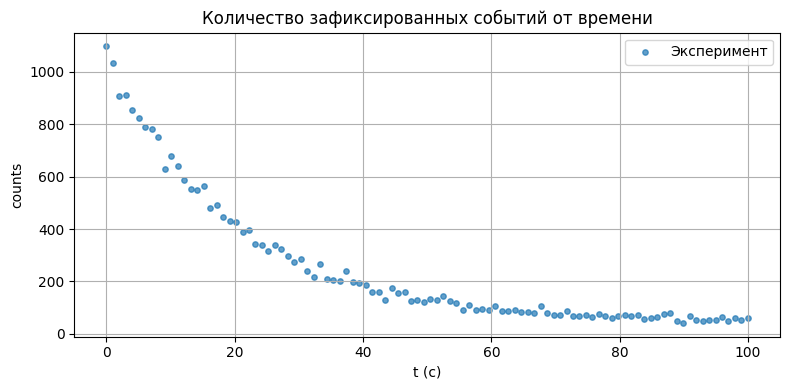

In [7]:
# 2. График исходных данных
plt.figure(figsize=(8, 4))
plt.scatter(t, y, s=15, alpha=0.7, label='Эксперимент')
plt.xlabel('t (с)')
plt.ylabel('counts')
plt.title('Количество зафиксированных событий от времени')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# 3. Грубая оценка фона B по "хвосту"
# Возьмем, например, последние 20% точек
tail_frac = 0.2
n_tail = int(len(t) * tail_frac)

t_tail = t[-n_tail:]
y_tail = y[-n_tail:]

B_est = np.mean(y_tail)
B_std = np.std(y_tail, ddof=1)

print(f'Оценка фона B ~ {B_est:.2f} ± {B_std:.2f}')

Оценка фона B ~ 60.25 ± 10.51


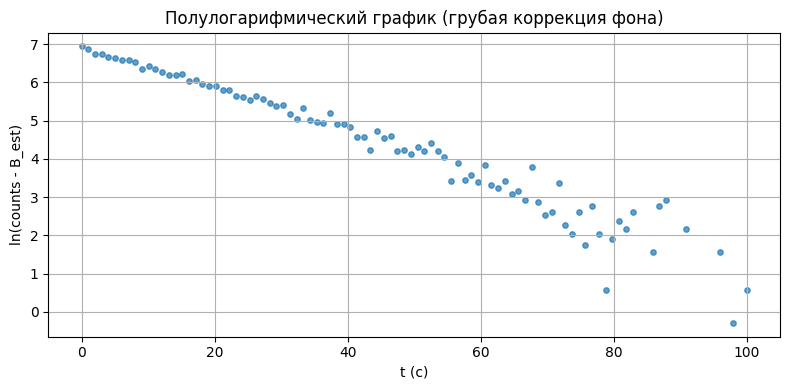

In [20]:
# 4. Полулогарифмический анализ: ln(y - B_est)
# Физически имеет смысл только где y > B_est
mask_pos = y > B_est
t_pos = t[mask_pos]
y_pos = y[mask_pos]

ln_y = np.log(y_pos - B_est)

plt.figure(figsize=(8, 4))
plt.scatter(t_pos, ln_y, s=15, alpha=0.7)
plt.xlabel('t (с)')
plt.ylabel('ln(counts - B_est)')
plt.title('Полулогарифмический график (грубая коррекция фона)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# 5. Полная нелинейная подгонка модели y = N0 * exp(-lambda * t) + B

def decay_model(t, N0, lambd, B):
    return N0 * np.exp(-lambd * t) + B

# Начальные приближения:
# N0 ~ y(0) - B_est, lambd ~ 0.01–0.1, B ~ B_est
N0_guess = max(y) - B_est
lambda_guess = 0.05
B_guess = B_est

p0 = [N0_guess, lambda_guess, B_guess]

params, cov = curve_fit(decay_model, t, y, p0=p0, maxfev=10000)
N0_fit, lambd_fit, B_fit = params
sigma_N0, sigma_lambd, sigma_B = np.sqrt(np.diag(cov))

print(f'N0 = {N0_fit:.2f} ± {sigma_N0:.2f}')
print(f'lambda = {lambd_fit:.4f} ± {sigma_lambd:.4f}  1/с')
print(f'B = {B_fit:.2f} ± {sigma_B:.2f}')

N0 = 1012.10 ± 7.26
lambda = 0.0504 ± 0.0008  1/с
B = 48.51 ± 3.24


In [13]:
# 6. Период полураспада T1/2 = ln(2)/lambda и его неопределенность
T_half = np.log(2) / lambd_fit
# dT/dλ = -ln(2) / λ^2
sigma_T_half = np.abs(-np.log(2) / (lambd_fit**2)) * sigma_lambd

print(f'T_1/2 = {T_half:.2f} ± {sigma_T_half:.2f} с')

T_1/2 = 13.76 ± 0.21 с


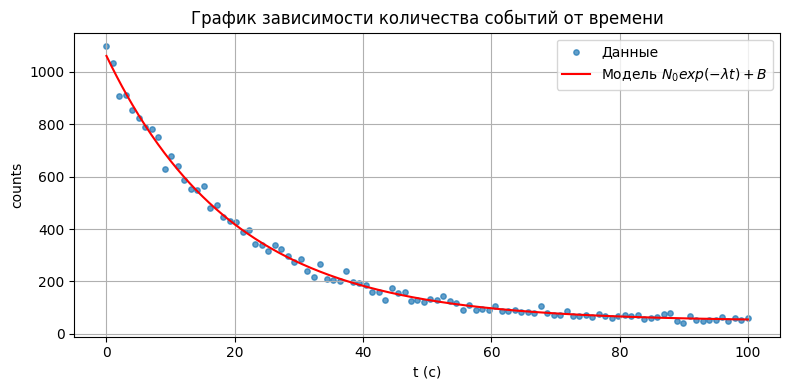

In [19]:
# 7. Визуализация подгонки
t_fit = np.linspace(t.min(), t.max(), 500)
y_fit = decay_model(t_fit, N0_fit, lambd_fit, B_fit)

plt.figure(figsize=(8, 4))
plt.scatter(t, y, s=15, alpha=0.7, label='Данные')
plt.plot(t_fit, y_fit, 'r', label='Модель $N_0 exp(-λt) + B$')
plt.xlabel('t (с)')
plt.ylabel('counts')
plt.title('График зависимости количества событий от времени')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

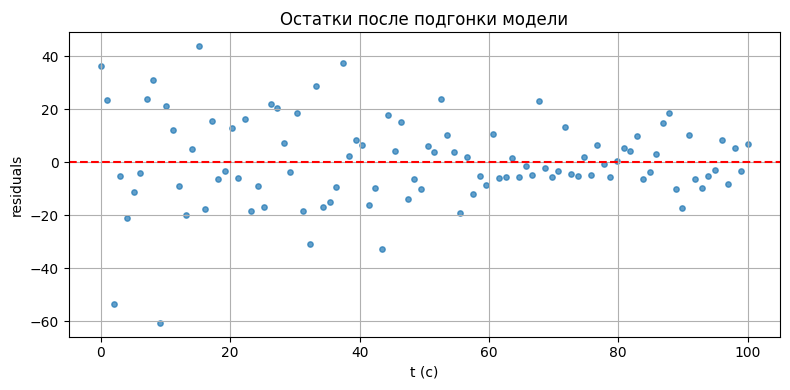

In [15]:
# 8. График остатков
residuals = y - decay_model(t, N0_fit, lambd_fit, B_fit)

plt.figure(figsize=(8, 4))
plt.scatter(t, residuals, s=15, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('t (с)')
plt.ylabel('residuals')
plt.title('Остатки после подгонки модели')
plt.grid(True)
plt.tight_layout()
plt.show()

## Задача 7: Резонансная кривая колебательного контура
**Физика:** Амплитудно-частотная характеристика (АЧХ) колебательного контура вблизи резонанса описывается функцией Лоренца:
$$ U(f) = \frac{U_{max}}{\sqrt{1 + Q^2 \left(\frac{f}{f_0} - \frac{f_0}{f}\right)^2}} $$
где $f_0$ — резонансная частота, $Q$ — добротность контура.

**Задание:**
1. Постройте график экспериментальных точек $(f, U)$.
2. Грубо оцените $f_0$ (по положению максимума) и $U_{max}$.
3. Аппроксимируйте данные теоретической формулой, чтобы найти точные значения $f_0$ и $Q$.
4. **Численно** найдите ширину резонанса на полувысоте (FWHM — Full Width at Half Maximum), решив уравнение $U(f) = U_{max}/\sqrt{2}$ относительно $f$ (или найдя ширину по аппроксимированной кривой).

**Инструменты:** Определение сложной функции для `curve_fit`, методы поиска корней (`scipy.optimize.root` или интерполяция).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [25]:
# 1. Загрузка данных
df = pd.read_csv('task7_resonance.csv')
f = df['frequency'].values   # частота
U = df['voltage'].values     # напряжение

print(df.head())
print(df.describe())

   frequency   voltage
0  50.000000  0.501648
1  51.010101  0.297347
2  52.020202  0.358979
3  53.030303  0.408643
4  54.040404  0.301662
        frequency     voltage
count  100.000000  100.000000
mean   100.000000    1.474192
std     29.304537    1.220426
min     50.000000    0.246209
25%     75.000000    0.673120
50%    100.000000    0.992784
75%    125.000000    1.889888
max    150.000000    5.166014


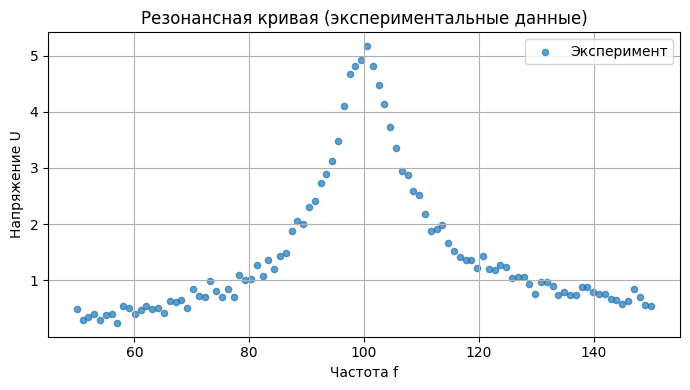

In [24]:
# 2. График экспериментальной АЧХ
plt.figure(figsize=(7, 4))
plt.scatter(f, U, s=20, alpha=0.7, label='Эксперимент')
plt.xlabel('Частота f')
plt.ylabel('Напряжение U')
plt.title('Амплитудно-частотная характеристика колебательного контура')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
# 3. Грубые оценки f0 и Umax по данным
idx_max = np.argmax(U)
f0_guess = f[idx_max]
Umax_guess = U[idx_max]

print(f'Грубая оценка f0 ≈ {f0_guess:.2f}')
print(f'Грубая оценка Umax ≈ {Umax_guess:.2f}')

# Добротность Q можно взять "на глаз", например 5–20
Q_guess = 10.0

Грубая оценка f0 ≈ 100.51
Грубая оценка Umax ≈ 5.17


In [28]:
# 4. Определяем модель Лоренца

def lorentz_amp(f, Umax, f0, Q):
    term = Q * (f/f0 - f0/f)
    return Umax / np.sqrt(1 + term**2)

p0 = [Umax_guess, f0_guess, Q_guess]

In [29]:
# 5. Нелинейная подгонка модели
params, cov = curve_fit(lorentz_amp, f, U, p0=p0, maxfev=10000)
Umax_fit, f0_fit, Q_fit = params
sigma_Umax, sigma_f0, sigma_Q = np.sqrt(np.diag(cov))

print(f'Umax = {Umax_fit:.3f} ± {sigma_Umax:.3f}')
print(f'f0   = {f0_fit:.3f} ± {sigma_f0:.3f}')
print(f'Q    = {Q_fit:.3f} ± {sigma_Q:.3f}')

Umax = 5.054 ± 0.046
f0   = 100.012 ± 0.072
Q    = 10.208 ± 0.162


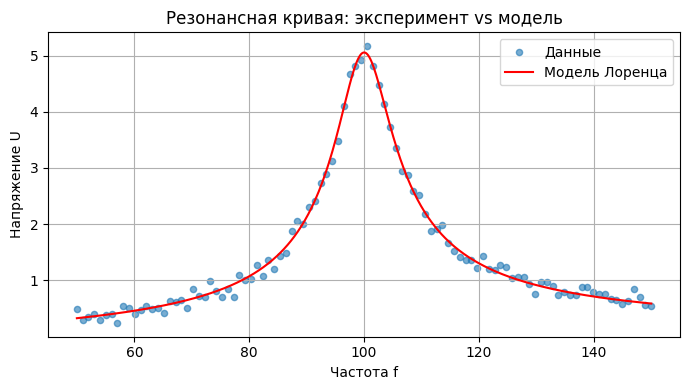

In [30]:
# 6. Визуализация подгонки
f_fit = np.linspace(f.min(), f.max(), 500)
U_fit = lorentz_amp(f_fit, Umax_fit, f0_fit, Q_fit)

plt.figure(figsize=(7, 4))
plt.scatter(f, U, s=20, alpha=0.6, label='Данные')
plt.plot(f_fit, U_fit, 'r', label='Модель Лоренца')
plt.xlabel('Частота f')
plt.ylabel('Напряжение U')
plt.title('Резонансная кривая: эксперимент vs модель')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# 7. Поиск ширины резонанса на полувысоте (FWHM)

# Уровень полувысоты:
U_half = Umax_fit / np.sqrt(2)

# Вычислим разность (U_model - U_half) на сетке
diff = U_fit - U_half

# Найдём точки смены знака diff -> вблизи этих f находятся решения U(f) = U_half
sign = np.sign(diff)
sign_change_idx = np.where(np.diff(sign) != 0)[0]

# Ожидаем два пересечения (ниже и выше f0)
f_half_points = []
for idx in sign_change_idx:
    # Линейная интерполяция между точками idx и idx+1
    f1, f2 = f_fit[idx], f_fit[idx+1]
    d1, d2 = diff[idx], diff[idx+1]
    # f* = f1 - d1 * (f2 - f1) / (d2 - d1)
    f_star = f1 - d1 * (f2 - f1) / (d2 - d1)
    f_half_points.append(f_star)

f_half_points = np.array(sorted(f_half_points))

if len(f_half_points) >= 2:
    f_low, f_high = f_half_points[0], f_half_points[-1]
    FWHM = f_high - f_low
    print(f'f_low  ≈ {f_low:.3f}')
    print(f'f_high ≈ {f_high:.3f}')
    print(f'Ширина резонанса (FWHM) ≈ {FWHM:.3f}')
else:
    print("Не удалось корректно найти две точки на полувысоте.")

f_low  ≈ 95.233
f_high ≈ 105.031
Ширина резонанса (FWHM) ≈ 9.798


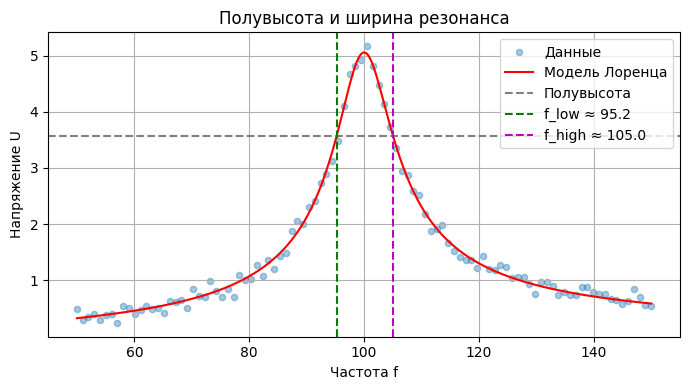

In [32]:
# 8. Визуализация полувысоты и точек FWHM

plt.figure(figsize=(7, 4))
plt.scatter(f, U, s=20, alpha=0.4, label='Данные')
plt.plot(f_fit, U_fit, 'r', label='Модель Лоренца')
plt.axhline(U_half, color='gray', linestyle='--', label='Полувысота')

if len(f_half_points) >= 2:
    plt.axvline(f_low, color='g', linestyle='--', label=f'f_low ≈ {f_low:.1f}')
    plt.axvline(f_high, color='m', linestyle='--', label=f'f_high ≈ {f_high:.1f}')

plt.xlabel('Частота f')
plt.ylabel('Напряжение U')
plt.title('Полувысота и ширина резонанса')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 8: Закон остывания Ньютона (Численное дифференцирование)
**Физика:** Скорость остывания тела пропорциональна разности температур тела и среды:
$$ \frac{dT}{dt} = -k (T - T_{env}) $$

**Задание:**
1. Загрузите данные измерений температуры $T(t)$. Температура среды $T_{env}$ известна.
2. Сгладьте зашумленные данные температуры (например, фильтром Савицкого-Голея), так как прямое дифференцирование шума дает большую погрешность.
3. Вычислите производную $\frac{dT}{dt}$ численно (например, функцией `np.gradient`).
4. Постройте график зависимости скорости остывания $\frac{dT}{dt}$ от разности температур $(T - T_{env})$ — так называемый фазовый портрет.
5. Проверьте линейность этой зависимости и найдите коэффициент остывания $k$ с помощью линейной регрессии.

**Инструменты:** `scipy.signal.savgol_filter`, `np.gradient`, `scipy.stats.linregress`.

## Задача 9: Петля магнитного гистерезиса (Численное интегрирование)
**Физика:** Зависимость намагниченности $M$ от внешнего поля $H$ при циклическом перемагничивании образует замкнутую петлю. Площадь внутри петли пропорциональна потерям энергии на гистерезис за один цикл:
$$ W = \oint M \, dH $$

**Задание:**
1. Загрузите данные цикла перемагничивания $(H, M)$.
2. Разделите данные на «верхнюю» (ход поля в одну сторону) и «нижнюю» (ход поля обратно) ветви, если необходимо, или работайте с полным массивом.
3. Визуализировать петлю гистерезиса.
4. Вычислите площадь внутри петли методом численного интегрирования (формула трапеций или Симпсона).
5. *(Дополнительно)* Найдите коэрцитивную силу $H_c$ (пересечение с осью $H$) и остаточную намагниченность $M_r$ (пересечение с осью $M$).

**Инструменты:** `np.trapz` (метод трапеций) или `scipy.integrate.simpson`.

## Задача 10: Поиск сигнала на фоне (Анализ гистограмм)
**Физика:** В спектроскопии часто нужно выделить узкий пик (сигнал) на широком пьедестале (фоне).
Модель спектра:
$$ F(x) = \text{Gaussian}(x, A, \mu, \sigma) + \text{Background}(x, a, b) $$
где фон, например, линейный или экспоненциальный.

**Задание:**
1. Загрузите массив «сырых» данных (энергии частиц). Это не график, а набор чисел.
2. Постройте гистограмму распределения энергий. Подберите оптимальное число бинов.
3. Получите высоты бинов и центры интервалов.
4. Аппроксимируйте гистограмму суммарной моделью (Гаусс + линейный фон).
5. Вычтите найденный фон из гистограммы, оставив только «чистый» пик.
6. Оцените полное число событий в сигнальном пике (как площадь под гауссианой или сумму отсчетов в очищенной гистограмме).

**Инструменты:** `plt.hist` (возвращает значения), составная функция для `curve_fit`.